# Analysis of Data Science Salaries 
**Source:** [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv)

### Data Description

- **work_year**: The year the salary was paid.
  
- **experience_level**: The experience level in the job during the year with the following possible values:
  - **EN**: Entry-level / Junior
  - **MI**: Mid-level / Intermediate
  - **SE**: Senior-level / Expert
  - **EX**: Executive-level / Director

- **employment_type**: The type of employment for the role:
  - **PT**: Part-time
  - **FT**: Full-time
  - **CT**: Contract
  - **FL**: Freelance

- **job_title**: The role worked in during the year.

- **salary**: The total gross salary amount paid.

- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

- **salary_in_usd**: The salary in USD (FX rate divided by average USD rate for the respective year via fxdata.foorilla.com).

- **employee_residence**: Employee's primary country of residence during the work year as an ISO 3166 country code.

- **remote_ratio**: The overall amount of work done remotely
  - **0**: No remote work (less than 20%)
  - **50**: Partially remote
  - **100**: Fully remote (more than 80%)

- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.

- **company_size**: The average number of people that worked for the company during the year:
  - **S**: Less than 50 employees (small)
  - **M**: 50 to 250 employees (medium)
  - **L**: More than 250 employees (large)


### Analysis Goals

1. **Salary Trends by Experience Level**

2. **Geographical Salary Disparities**:

3. **Remote Work Impact**

4. **Company Size Influence**


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('data_science_salaries.csv')

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
df = df.drop('Unnamed: 0', axis=1)

In [23]:
df.shape

(607, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [25]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

---

>The dataset contains a lot of unique values, and 'job_title' in particular is very "specific". It makes sense to simplify this a bit, and group the job titles by what field the person works in, instead of their exact position title. Also, we have the 'experience_level' column that tells us how much experience they have, which is helpful.


---

In [26]:
def simplify_job_title(title):
    if 'Data Scientist' in title:
        return 'Data Science'
    elif 'Machine Learning' in title or 'AI' in title:
        return 'Machine Learning'
    elif 'Data Engineer' in title:
        return 'Data Engineering'
    elif 'Data Analyst' in title:
        return 'Data Analysis'
    else:
        return 'Other'

In [36]:
df['job_category'] = df['job_title'].apply(simplify_job_title)

In [37]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Science
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Machine Learning
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineering
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analysis
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning


---

> I'll also replace the abbreviations for better readability

---

In [13]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)

In [12]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [38]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Science


In [30]:
df.groupby(['job_category'], as_index=False)['salary_in_usd'].mean()

,job_category,salary_in_usd
0,Data Analysis,93200.378151
1,Data Engineering,115808.512658
2,Data Science,115134.603774
3,Machine Learning,107879.739130
4,Other,127706.990196


In [31]:
df.groupby(['experience_level'], as_index=False)['salary_in_usd'].mean()

,experience_level,salary_in_usd
0,Entry-Level,61643.318182
1,Executive Level,199392.038462
2,Mid-Level,87996.056338
3,Senior,138617.292857


Text(0.5, 1.0, 'Salary by experience level (USD)')

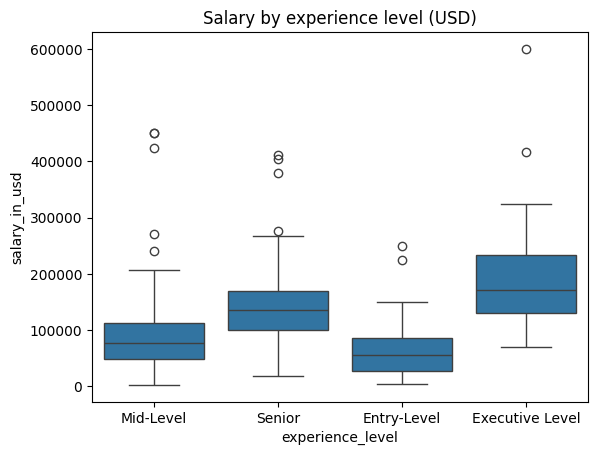

In [59]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by experience level (USD)')

<Axes: xlabel='job_category', ylabel='count'>

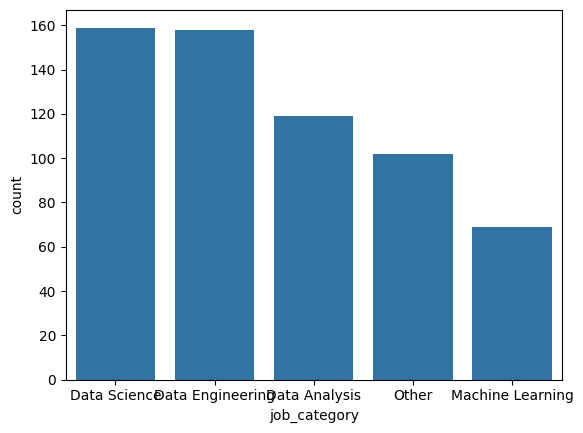

In [60]:
sns.countplot(x='job_category', data=df, order=df['job_category'].value_counts().index)

Text(0.5, 1.0, 'Salary Distribution by Job Category')

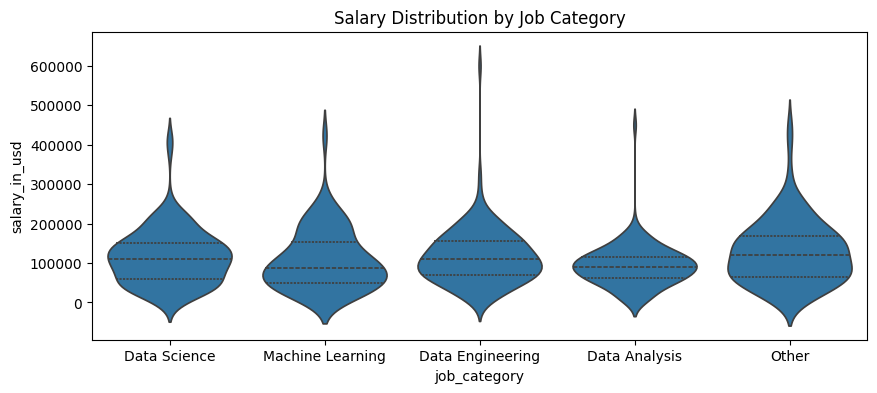

In [51]:
plt.figure(figsize=(10, 4))
sns.violinplot(x='job_category', y='salary_in_usd', data=df, scale='width', inner='quartile')
plt.title('Salary Distribution by Job Category')

Text(0.5, 1.0, 'Average salary by company size')

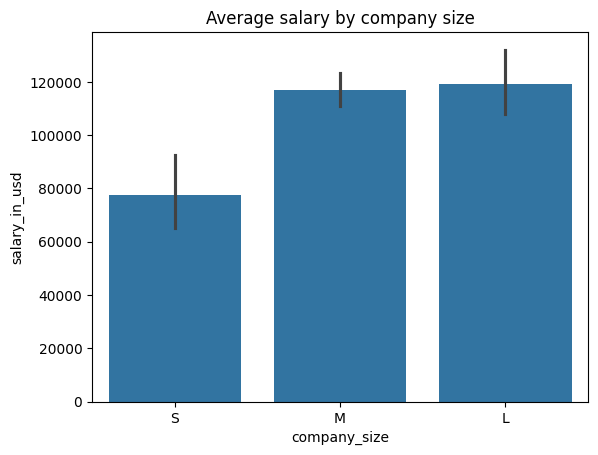

In [63]:
sns.barplot(x='company_size', y='salary_in_usd', data=df, estimator=np.mean, order=['S', 'M', 'L'])
plt.title('Average salary by company size')

Text(0.5, 1.0, 'Salary by Remote Work Ratio')

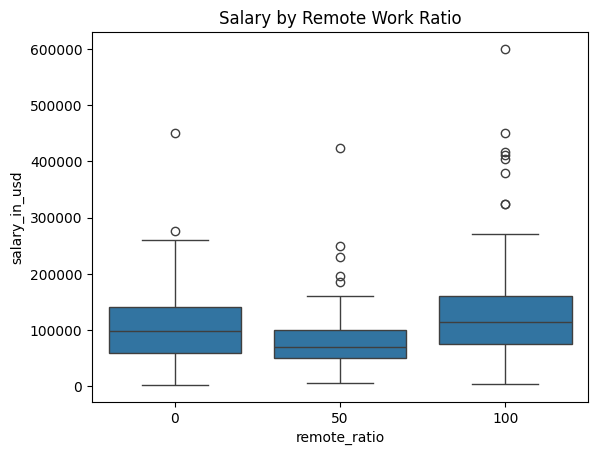

In [64]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary by Remote Work Ratio')

Text(0.5, 1.0, 'Salary by employment type')

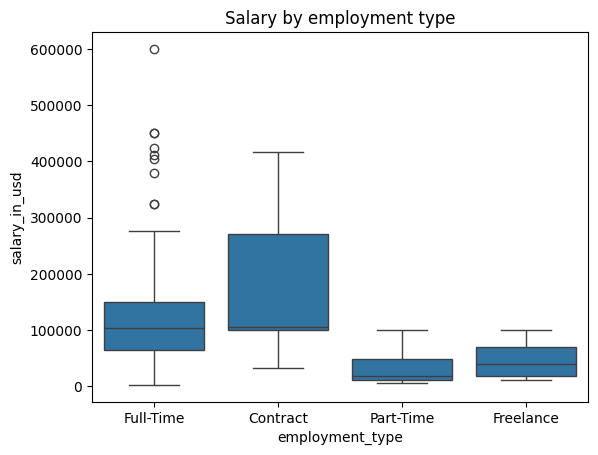

In [71]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by employment type')